In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from precision_recall_cutoff import precision_recall_cutoff

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

#defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

#defining the file to be read from s3 bucket
file_key = 'turnover.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datafile
turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#changing sales and salary to dummies
turnover = pd.concat([turnover.drop(columns=['sales','salary'],axis=1), pd.get_dummies(turnover[['sales','salary']])],axis=1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.479\nsamples = 3377\nvalue = [1342, 2035]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.214\nsamples = 1409\nvalue = [172, 1237]'),
 Text(0.0625, 0.125, 'gini = 0.107\nsamples = 1306\nvalue = [74, 1232]'),
 Text(0.1875, 0.125, 'gini = 0.092\nsamples = 103\nvalue = [98, 5]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.482\nsamples = 1968\nvalue = [1170, 798]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 703\nvalue = [0, 703]'),
 Text(0.4375, 0.125, 'gini = 0.139\nsamples = 1265\nvalue = [1170, 95]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 8622\nvalue = [7800, 822]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.028\nsamples = 7040\nvalue = [6940, 100]'),
 Text(0.5625, 0.125, 'gini = 0.026\nsamples = 7033\nvalue = [6940, 93]'),
 Text(0.6875, 0.125, 'gini = 0.

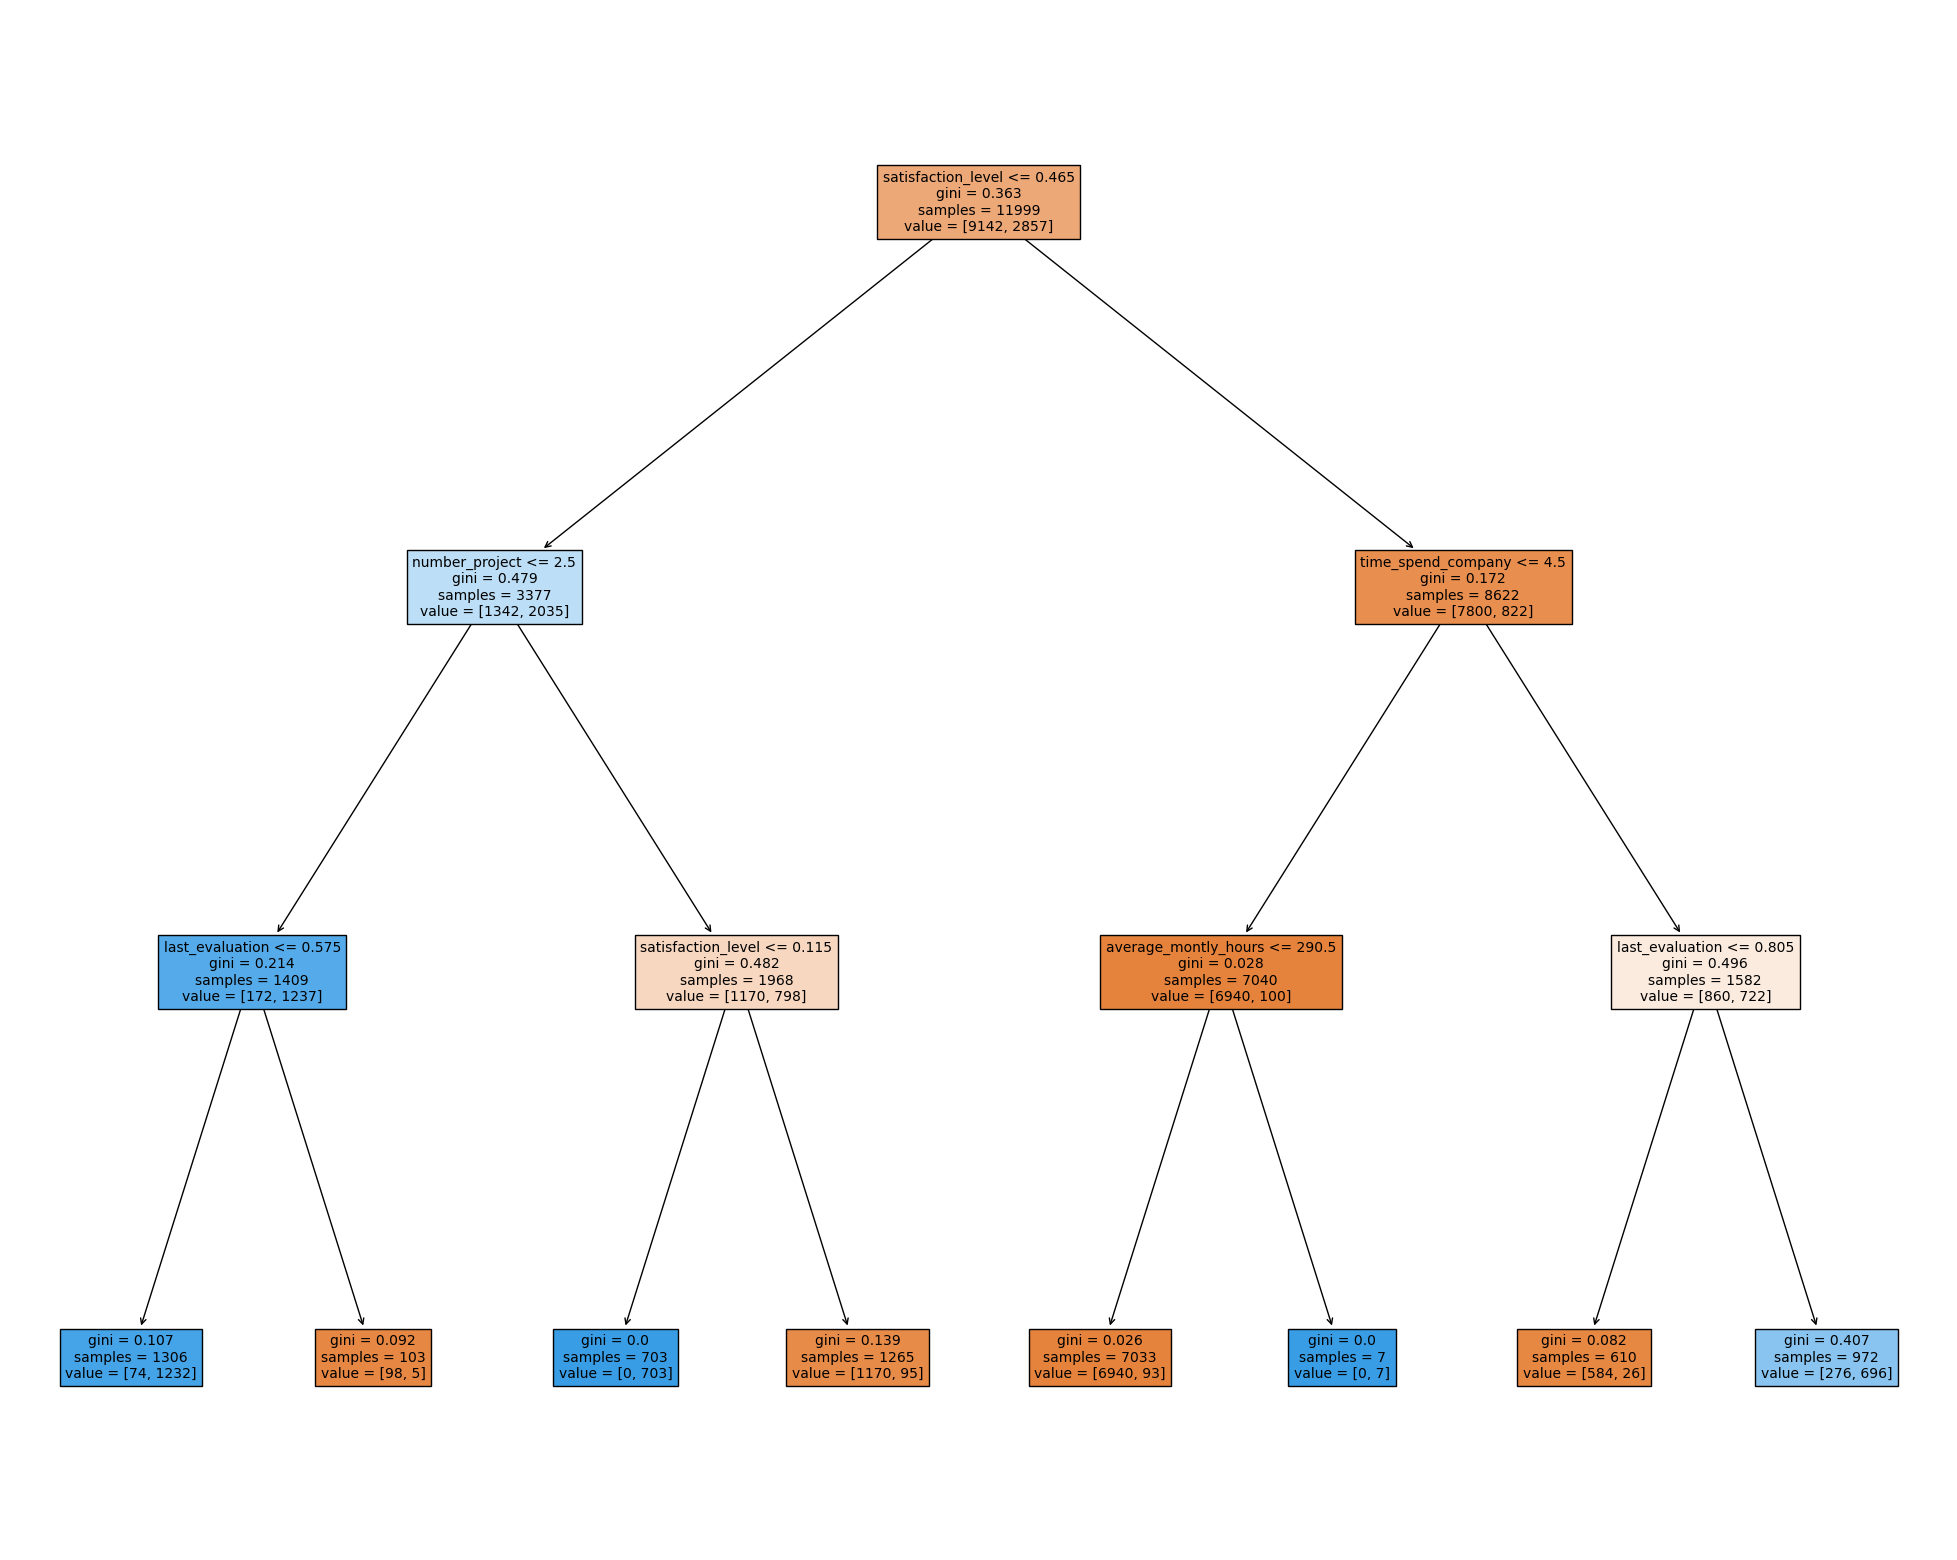

In [6]:
#defining input and target
x=turnover.drop(columns=['left'],axis=1)
y=turnover['left']

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

#building decision tree model
tree_md = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

fig = plt.figure(figsize = (25,20))
plot_tree(tree_md,feature_names=x_train.columns,filled=True)

In [10]:
#Note: value [0's, 1's]. 0's spot are number of people that did not leave, 1's are employees who left

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.478\nsamples = 3333\nvalue = [1320, 2013]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.209\nsamples = 1370\nvalue = [162, 1208]'),
 Text(0.0625, 0.125, 'gini = 0.095\nsamples = 1264\nvalue = [63, 1201]'),
 Text(0.1875, 0.125, 'gini = 0.123\nsamples = 106\nvalue = [99, 7]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.484\nsamples = 1963\nvalue = [1158, 805]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 715\nvalue = [0, 715]'),
 Text(0.4375, 0.125, 'gini = 0.134\nsamples = 1248\nvalue = [1158, 90]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.176\nsamples = 8666\nvalue = [7822, 844]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.027\nsamples = 7070\nvalue = [6974, 96]'),
 Text(0.5625, 0.125, 'gini = 0.025\nsamples = 7062\nvalue = [6974, 88]'),
 Text(0.6875, 0.125, 'gini = 0.0

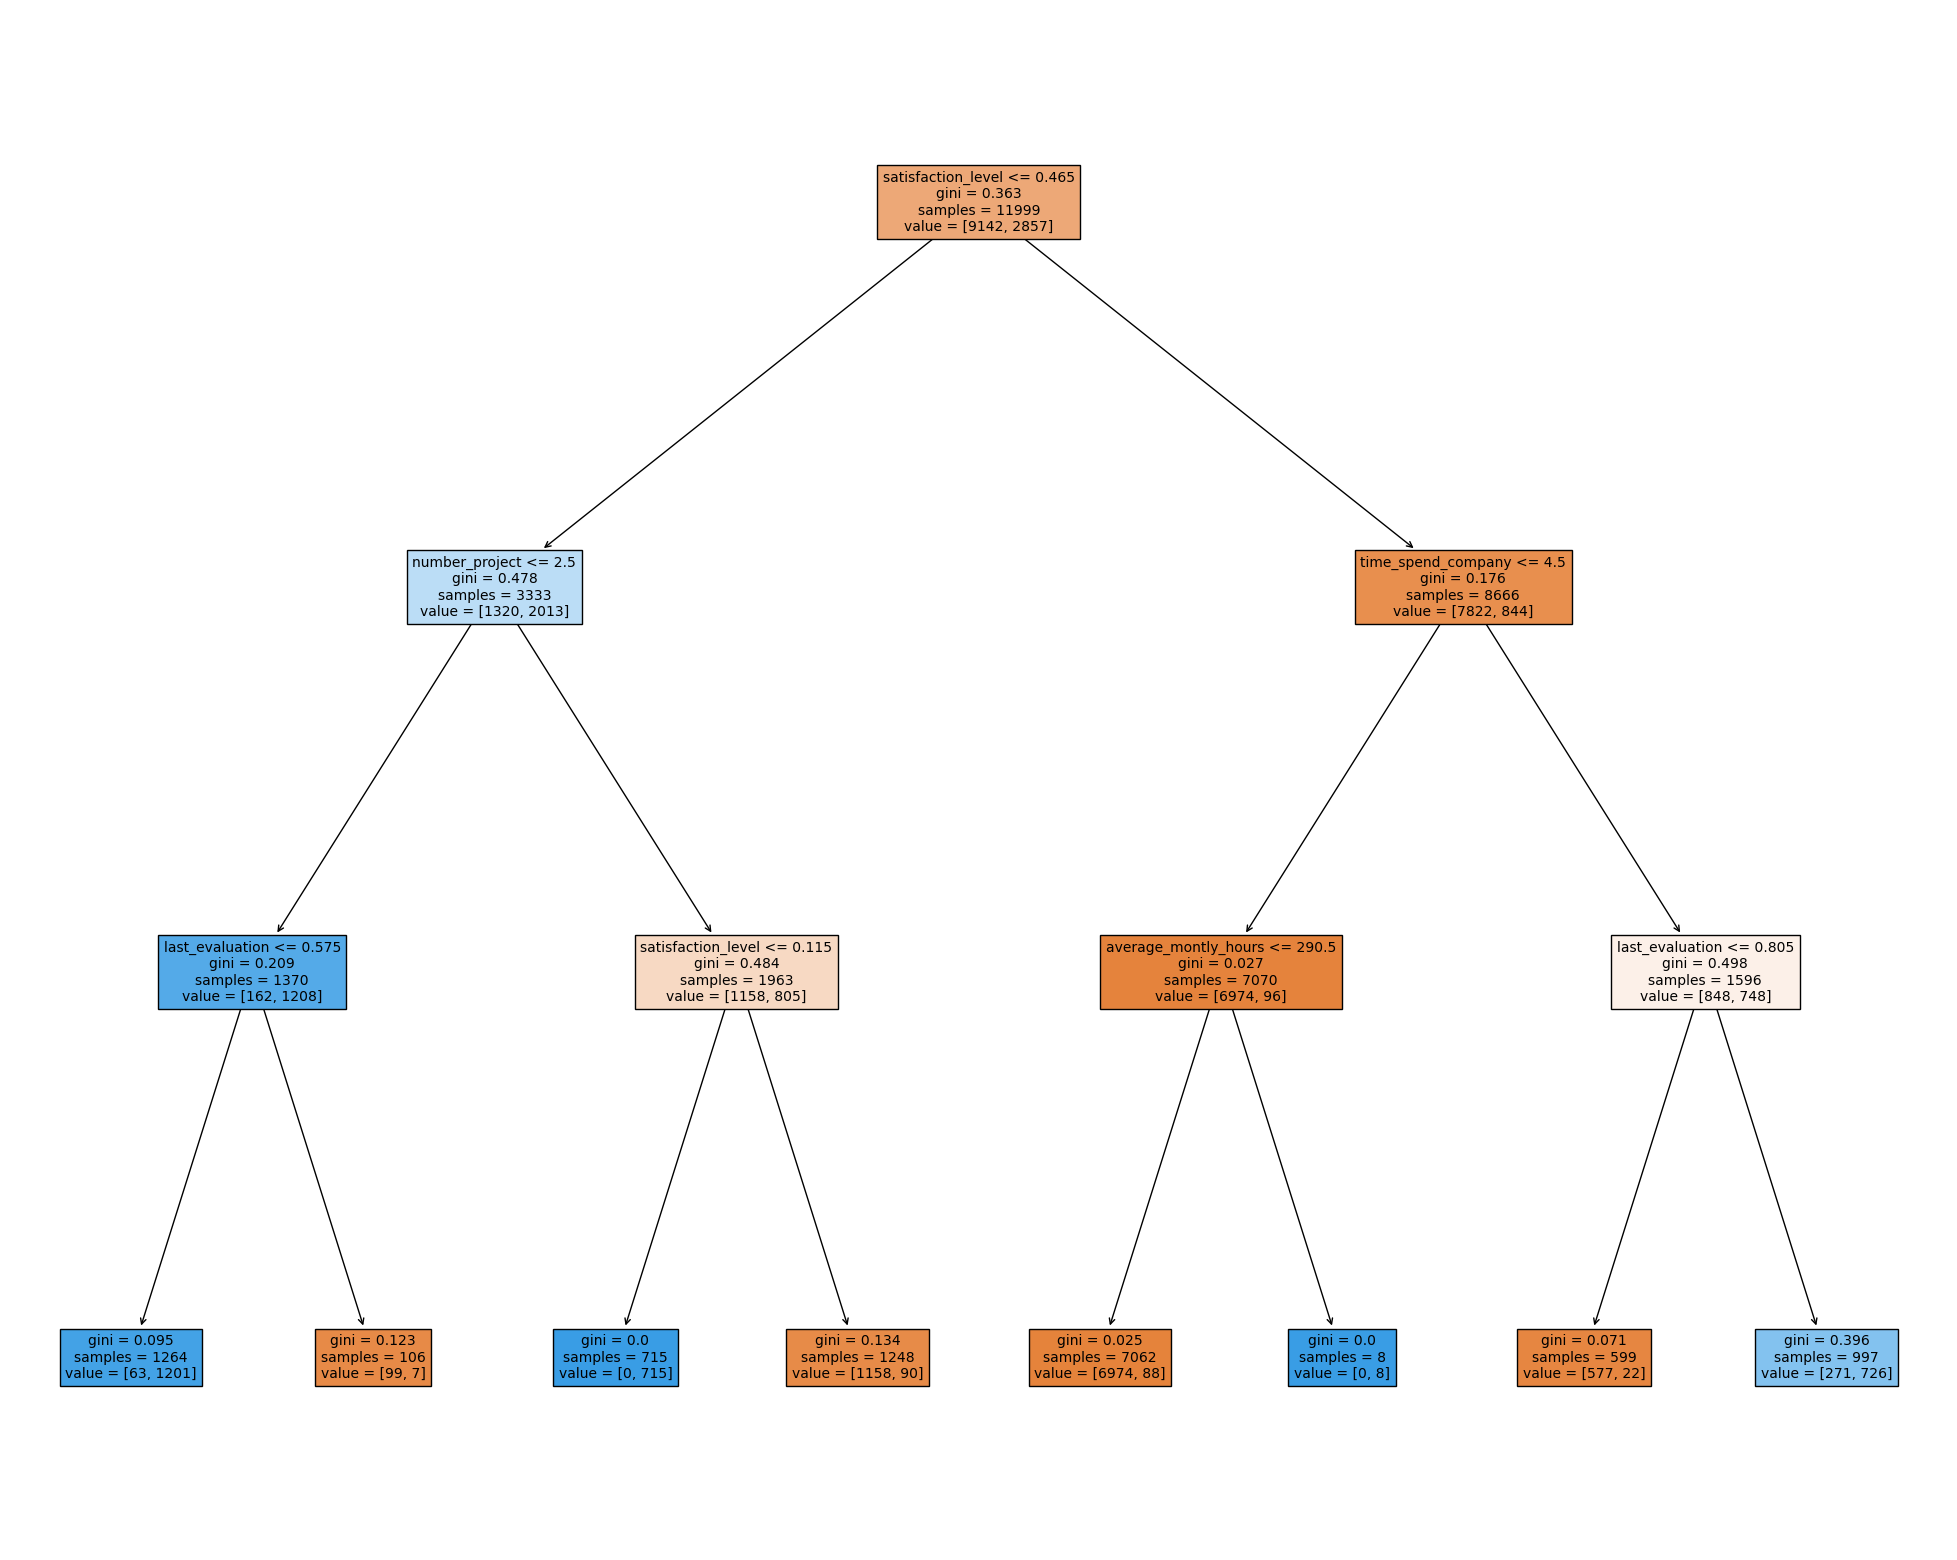

In [8]:
#defining input and target
x=turnover.drop(columns=['left'],axis=1)
y=turnover['left']

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

#building decision tree model
tree_md = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

fig = plt.figure(figsize = (25,20))
plot_tree(tree_md,feature_names=x_train.columns,filled=True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.478\nsamples = 3362\nvalue = [1328, 2034]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.212\nsamples = 1401\nvalue = [169, 1232]'),
 Text(0.0625, 0.125, 'gini = 0.1\nsamples = 1295\nvalue = [68, 1227]'),
 Text(0.1875, 0.125, 'gini = 0.09\nsamples = 106\nvalue = [101, 5]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.483\nsamples = 1961\nvalue = [1159, 802]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 713\nvalue = [0, 713]'),
 Text(0.4375, 0.125, 'gini = 0.132\nsamples = 1248\nvalue = [1159, 89]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.172\nsamples = 8637\nvalue = [7814, 823]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.0\ngini = 0.029\nsamples = 7087\nvalue = [6984, 103]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7082\nvalue = [6984, 98]'),
 Text(0.6875, 0.125, 'gini = 0.0\

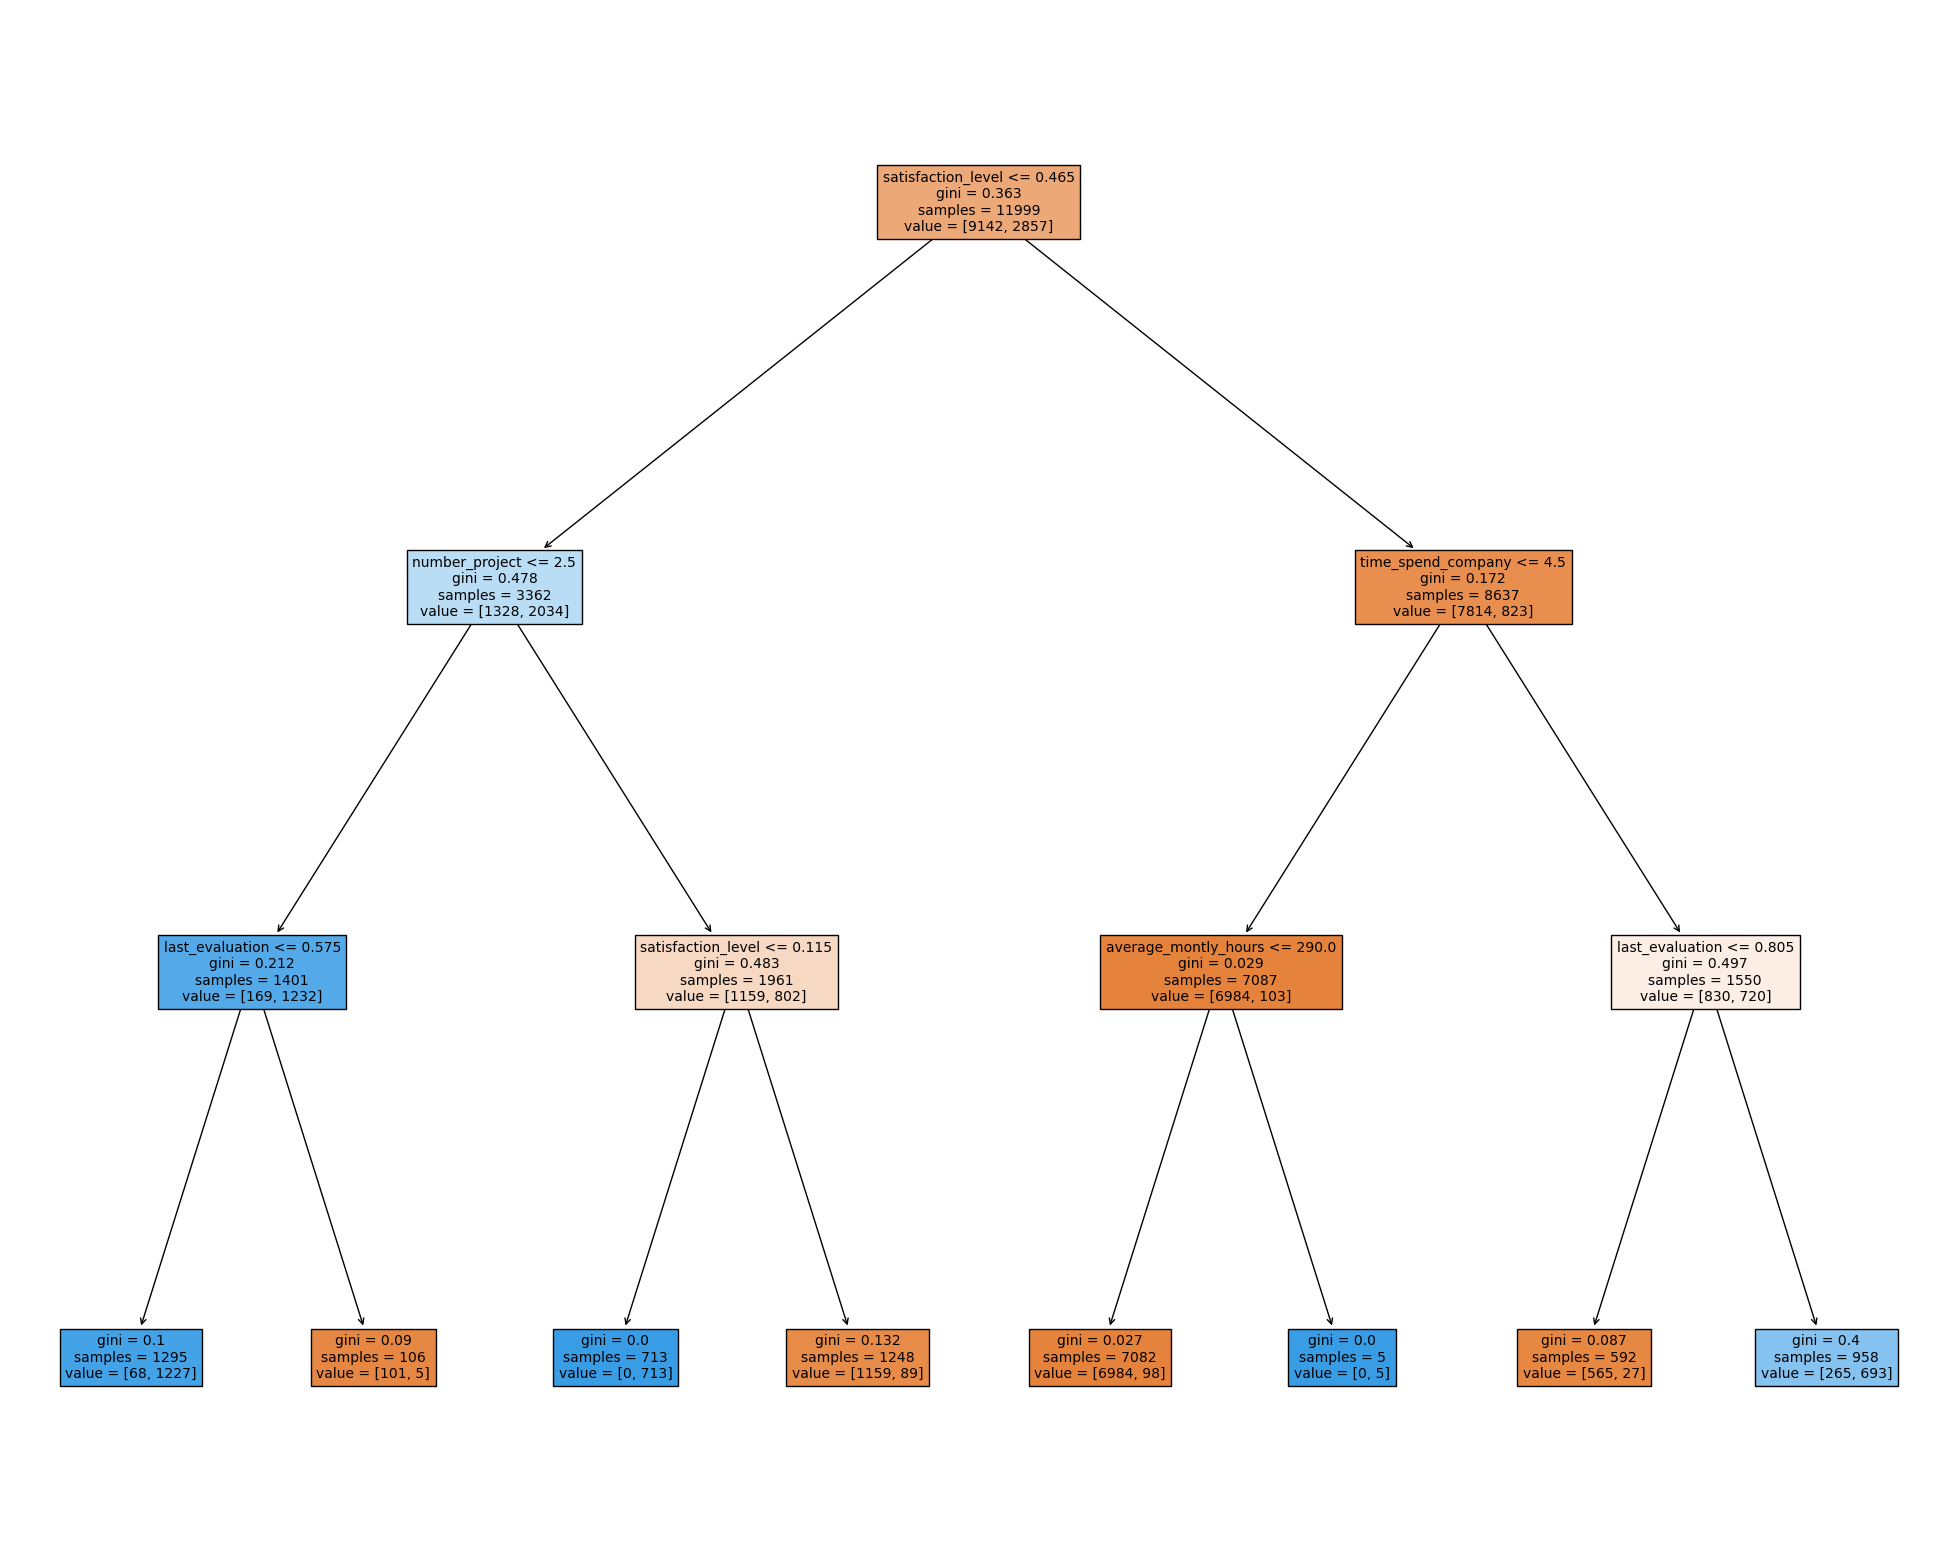

In [9]:
#defining input and target
x=turnover.drop(columns=['left'],axis=1)
y=turnover['left']

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

#building decision tree model
tree_md = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

fig = plt.figure(figsize = (25,20))
plot_tree(tree_md,feature_names=x_train.columns,filled=True)

In [11]:
#creating new features
turnover['interaction_1'] = np.where((turnover['satisfaction_level'] <= 0.465) & 
                                     (turnover['number_project'] > 2.5) & 
                                     (turnover['satisfaction_level'] >= 0.115), 1, 0)

turnover['interaction_2'] = np.where((turnover['satisfaction_level'] <= 0.465) & 
                                     (turnover['number_project'] <= 2.5) & 
                                     (turnover['last_evaluation'] <= 0.575), 1, 0)

turnover['interaction_3'] = np.where((turnover['satisfaction_level'] > 0.465) & 
                                     (turnover['time_spend_company'] <= 4.5) & 
                                     (turnover['average_montly_hours'] <= 290.5), 1, 0)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,interaction_1,interaction_2,interaction_3
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [12]:
#defining input and target
x=turnover.drop(columns=['left'],axis=1)
y=turnover['left']

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

**Random Forest w/ Interactions**

In [14]:
#building the model
rf_md=RandomForestClassifier(n_estimators = 500, max_depth=3).fit(x_train,y_train)

#predict on test
rf_pred = rf_md.predict_proba(x_test)[:,1]

#changing likelihoods to labels
rf_label = precision_recall_cutoff(y_test, rf_pred)

#print classification report
print(classification_report(y_test,rf_label))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.92      0.92      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



**Random Forest w/out Interactions**

In [15]:
#dropping interactions
x_train = x_train.drop(columns = ['interaction_1', 'interaction_2', 'interaction_3'])
x_test = x_test.drop(columns = ['interaction_1', 'interaction_2', 'interaction_3'])

#building the model
rf_md=RandomForestClassifier(n_estimators = 500, max_depth=3).fit(x_train,y_train)

#predict on test
rf_pred = rf_md.predict_proba(x_test)[:,1]

#changing likelihoods to labels
rf_label = precision_recall_cutoff(y_test, rf_pred)

#print classification report
print(classification_report(y_test,rf_label))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2286
           1       0.93      0.69      0.80       714

    accuracy                           0.92      3000
   macro avg       0.92      0.84      0.87      3000
weighted avg       0.92      0.92      0.91      3000



Using the results from part 6 and 7, we would use the Random Forest Classifier model with the interaction variables to predict left (much better accuracy and recall scores)